In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [38]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [14]:
print X[0:10]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [15]:
print y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
# Compute clustering with Means
k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [13]:
import numpy as np
from sklearn.cluster import KMeans
k_means_labels = k_means.labels_
print k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
print k_means_cluster_centers
k_means_labels_unique = np.unique(k_means_labels)
print k_means_labels_unique

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[ 5.006       3.418       1.464       0.244     ]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
[0 1 2]


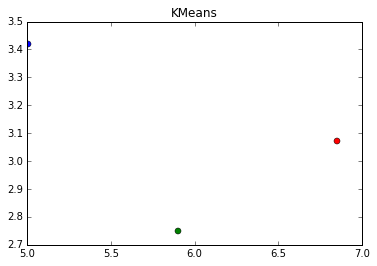

In [28]:
import pylab as pl
fig = pl.figure(1)
for center in k_means_cluster_centers:
    pl.plot(center[0], center[1], 'o')
pl.title('KMeans')
pl.show()

In [32]:
print range(3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
print colors
print zip(range(3), colors)
for k, col in zip(range(3), colors):
    print k, col

[0, 1, 2]
['#4EACC5', '#FF9C34', '#4E9A06']
[(0, '#4EACC5'), (1, '#FF9C34'), (2, '#4E9A06')]
0 #4EACC5
1 #FF9C34
2 #4E9A06


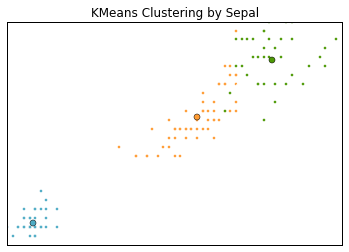

In [40]:
import pylab as pl
fig = pl.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for k, col in zip(range(3), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    pl.plot(X[my_members, 2], X[my_members, 3], 'w',
            markerfacecolor=col, marker='.')
    pl.plot(cluster_center[2], cluster_center[3], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
pl.title('KMeans Clustering by Sepal')
pl.xticks(())
pl.yticks(())
pl.show()

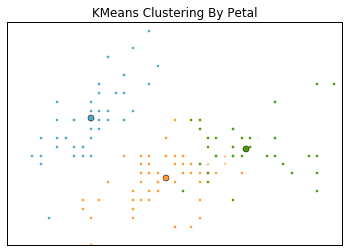

In [39]:
import pylab as pl
fig = pl.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for k, col in zip(range(3), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    pl.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    pl.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
pl.title('KMeans Clustering By Petal')
pl.xticks(())
pl.yticks(())
pl.show()